<a href="https://colab.research.google.com/github/isiddharthasharma/Data-Analysis/blob/main/Support_%26_Resistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description:** This program makes support and resistance line of a stock by taking data from past weeks along with trend lines<br>
**Version:** 0.4.5 | Changelog: https://isiddharthasharma.blogspot.com/2021/06/srmodel.html<br>
**Author & Editor:** Siddharth Sharma<br>


In [ ]:
! pip install yfinance

     |████████████████████████████████| 6.3MB 14.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=60c137881b9a7b4425613f8b3ee55f2f546b98a973542a595982df0efe17aab7
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
print("> Status: Importing modules from database...")
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.dates as mdates
from pandas_datareader import data
import pandas_datareader.data as web
from matplotlib.dates import DateFormatter
from datetime import date
print("> Status: Import Success!")

> Status: Importing modules from database...
> Status: Imported Success!


In [ ]:
tickersymbol = input("Write a commodity symbol:\n")
if(tickersymbol.isupper()):
    print("\n> Status: Symbol registered successfully\n> Symbol:", tickersymbol)
if(tickersymbol.islower()):
    print("\n> Status: Converting symbol into upper case...")
    tickersymbol = tickersymbol.upper()
    print("> Status: Symbol registered successfully\n> Symbol:", tickersymbol)

Write a commodity symbol:
GESHIP.NS

> Status: Symbol registered successfully
> Symbol: GESHIP.NS


> Status: Connecting to Yahoo Finance database...
> Status: Connected!
> Status: Fetching Data...
[*********************100%***********************]  1 of 1 completed
> Status: Loading data of GESHIP.NS
> Status: Data Loaded Successfully!
> Status: Processing Data...
> Status: Data Processing is completed!
> Status: Plotting data on chart


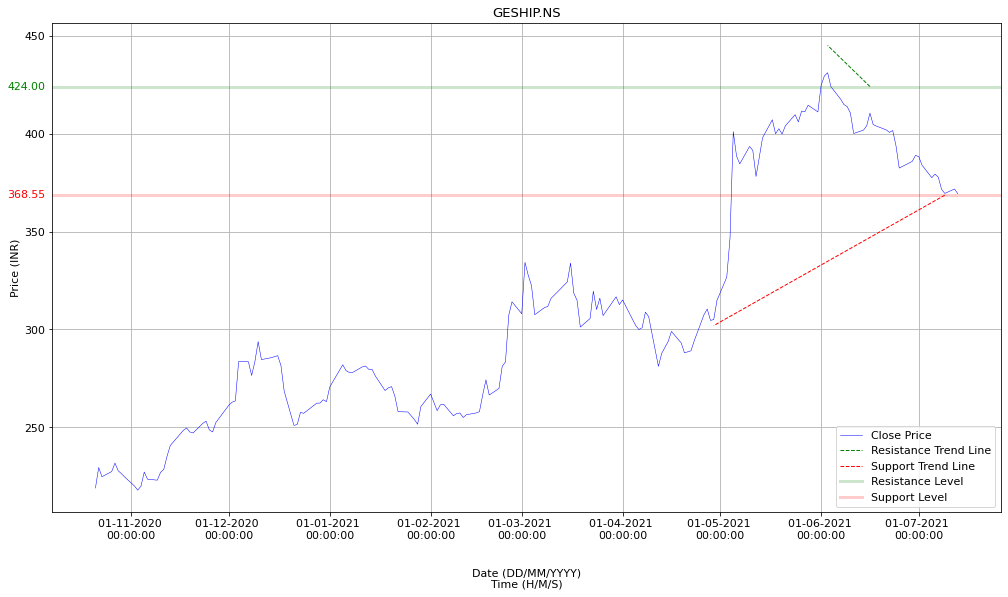

In [ ]:
class Database():
  def __init__(self, ticker, days):
    self.ticker = ticker
#    data = yf.download(ticker, period = '1y', interval = '60m', rounding= True)
    data = yf.download(ticker, start="2020-01-01", end=date.today()) #YYYY-MM-DD
    self.df = pd.DataFrame(data)
    pd.set_option('display.max_columns', None)
    self.df = self.df[-days:]
    
  def quote(self):
    return self.df

print("> Status: Connecting to Yahoo Finance database...\n> Status: Connected!\n> Status: Fetching Data...")
db = Database(tickersymbol, 180) # days is amount of days taken from df
df = db.quote()
print("> Status: Loading data of", tickersymbol)
#print(df.tail()) #debug 
print("> Status: Data Loaded Successfully!\n> Status: Processing Data...")

# Step 4: Adding trend resistance & support lines
pivot_high_1=df['High'][-21:-1].max() # -21:-1
pivot_high_2=df['High'][-55:-22].max() # -55:-22
pivot_low_1=df['Low'][-21:-1].min()
pivot_low_2=df['Low'][-55:-22].min()

H=[df['High'][-21:-1].idxmax(), pivot_high_1]
H1=[df['High'][-55:-22].idxmax(), pivot_high_2]

L=[df['Low'][-21:-1].idxmin(), pivot_low_1]
L1=[df['Low'][-55:-22].idxmin(), pivot_low_2]

x1_high_values = [H[0], H1[0]]
y1_high_values = [H[1], H1[1]]

x1_low_values = [L[0], L1[0]]
y1_low_values = [L[1], L1[1]]
print("> Status: Data Processing is completed!")

plt.rcParams.update({'font.size': 11})
fig, ax1 = plt.subplots(figsize=(17,9))

ax1.set_ylabel('Price (INR)')
ax1.set_xlabel('\n\nDate (DD/MM/YYYY)\nTime (H/M/S)')
ax1.set_title(db.ticker)
ax1.plot('Adj Close', data=df, label='Close Price', linewidth=0.5, color='blue')

ax1.plot(x1_high_values, y1_high_values, color='g', linestyle='--', linewidth=1, label='Resistance Trend Line')
ax1.plot(x1_low_values, y1_low_values, color='r', linestyle='--', linewidth=1, label='Support Trend Line')

ax1.axhline(y=pivot_high_1, color='g', linewidth=3, label='Resistance Level', alpha=0.2)
ax1.axhline(y=pivot_low_1, color='r', linewidth=3, label='Support Level', alpha=0.2)
trans = transforms.blended_transform_factory(ax1.get_yticklabels()[0].get_transform(), ax1.transData)
ax1.text(0,pivot_high_1, "{:.2f}".format(pivot_high_1), color="g", transform=trans,ha="right", va="center")
ax1.text(0,pivot_low_1, "{:.2f}".format(pivot_low_1), color="r", transform=trans,ha="right", va="center")

date_form = DateFormatter("%d-%m-%Y \n%H:%M:%S")
ax1.xaxis.set_major_formatter(date_form)
print("> Status: Plotting data on chart")
ax1.legend()
ax1.grid()
plt.show()

**Legend**


---
**Close Price:** Stock Price (LTP)<BR>
**Resistance Trend Line:**Up Trend<BR>
**Support Trend Line:** Down Trend<BR>
**Resistance Level:** Resistance in a sense is the opposite of support. Resistance is a price level on a chart where historically the stock has had difficulty rising above. This price level acts as a ceiling and prevents the stock from rising any further.<BR>
**Support Level:** Support is a price level on a stock chart where historically the stock has had difficulty falling below. The price level acts as a floor and prevents the price of the stock from falling any further.
<br>
>**A level of Support is always found BELOW prices.**